# M3: Project 3a

Analysis of Iris flower data set.

We will be using the pandas, matplotlib, seaborn, numpy, and scikit-learn libraries as well as the decision_boundaries module provided for the class.

We will configure our plots for readable labels, high resolution, and automatic layout.

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
from decision_boundaries import linear_decision_boundary_classifier
from sklearn.metrics import accuracy_score

plt.rc("axes", labelsize=18)
plt.rc("figure", dpi=150, autolayout=True)

We will define a helper function to plot a dashed line on the current plot given the slope/intercept to help visualize the boundaries.

In [2]:
def abline(slope, intercept):
    axes = plt.pyplot.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.pyplot.plot(x_vals, y_vals, '--')

We will load the `setosa_data.csv` file (provided for the class) and inspect the info/describe/head results.

In [3]:
df = pd.read_csv('./setosa_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              150 non-null    object 
 1   sepal_length (cm)  150 non-null    float64
 2   sepal_width (cm)   150 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.6+ KB


In [4]:
df.describe()

,sepal_length (cm),sepal_width (cm)
count,150.000000,150.000000
mean,5.843333,3.057333
std,0.828066,0.435866
min,4.300000,2.000000
25%,5.100000,2.800000
50%,5.800000,3.000000
75%,6.400000,3.300000
max,7.900000,4.400000


In [5]:
df.head()

,label,sepal_length (cm),sepal_width (cm)
0,not setosa,5.1,3.5
1,not setosa,4.9,3.0
2,not setosa,4.7,3.2
3,not setosa,4.6,3.1
4,not setosa,5.0,3.6


We will show a scatter plot of the length vs. the width with the provided labels.

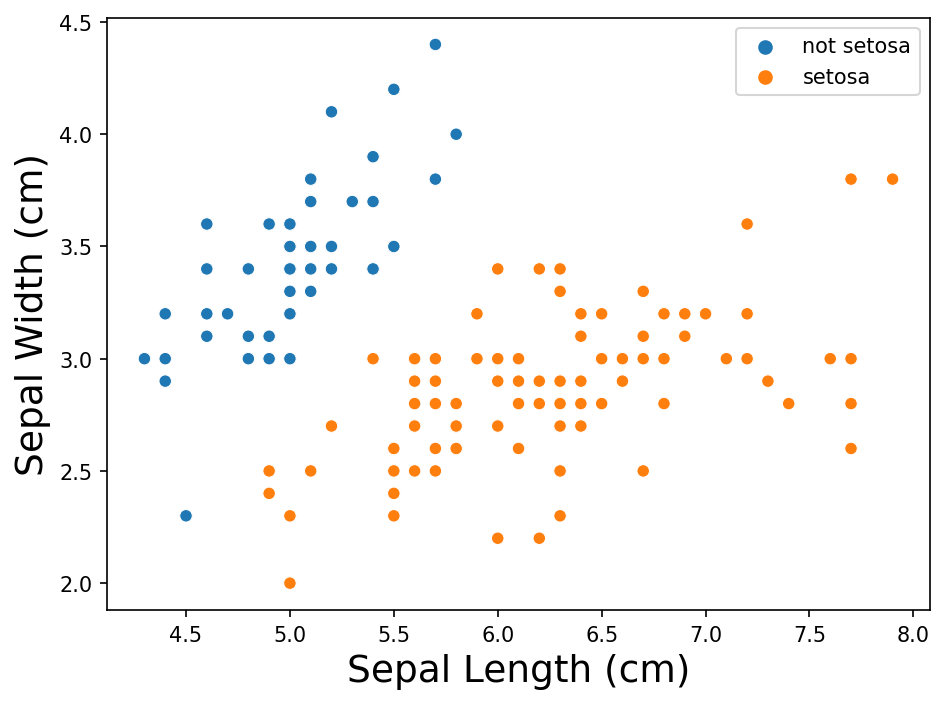

In [6]:
plot = sns.scatterplot(data=df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");

Now we will analyze three different linear boundaries (provided by the class).

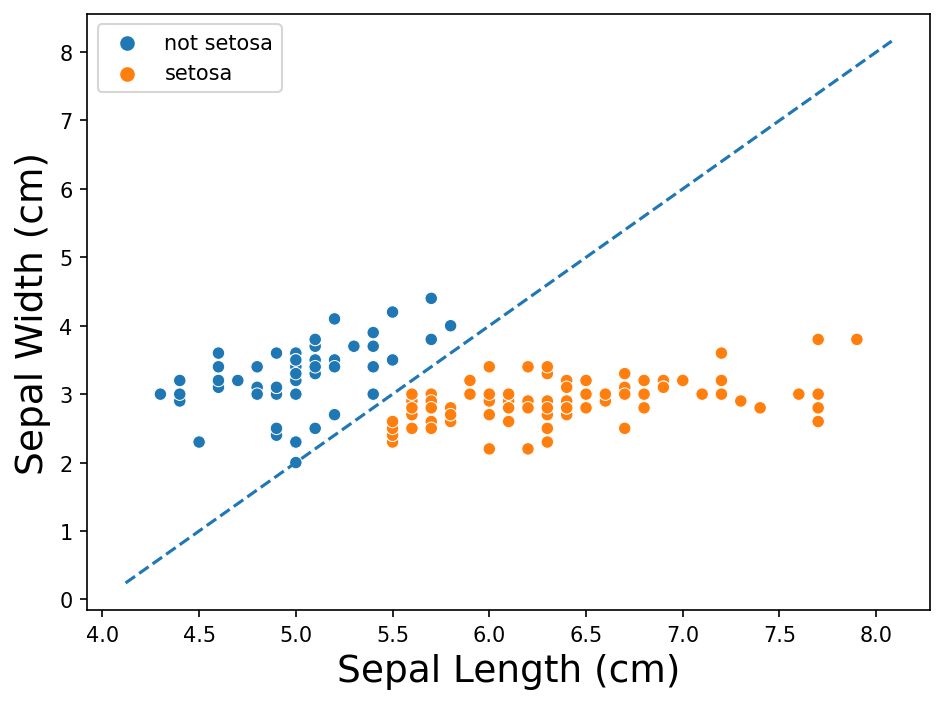

In [7]:
features = df[["sepal_length (cm)", "sepal_width (cm)"]].values
class_names = ["not setosa", "setosa"]

dec_bound_vec_1 = np.array([2, -1.00, -8])
pred_labels_1 = linear_decision_boundary_classifier(dec_bound_vec_1, features, class_names=class_names)
plot = sns.scatterplot(data=df, x="sepal_length (cm)", y="sepal_width (cm)", hue=pred_labels_1)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
abline(2, -8)

In [8]:
accuracy_score(df.label, pred_labels_1)

0.9533333333333334

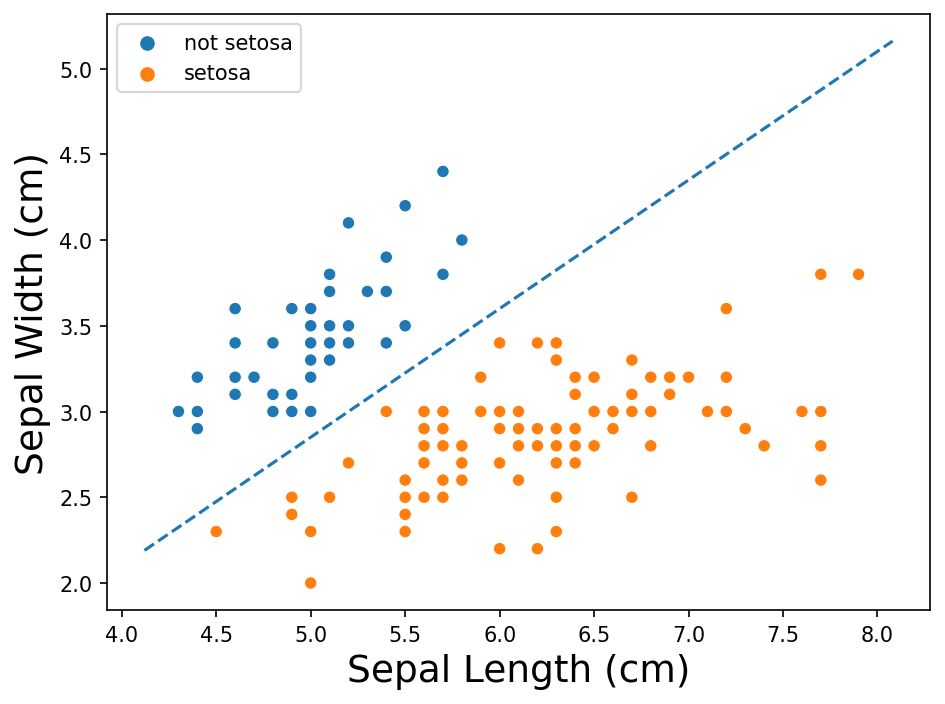

In [9]:
dec_bound_vec_2 = np.array([0.75, -1.00, -0.90])
pred_labels_2 = linear_decision_boundary_classifier(dec_bound_vec_2, features, class_names=class_names)
plot = sns.scatterplot(data=df, x="sepal_length (cm)", y="sepal_width (cm)", hue=pred_labels_2)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
abline(0.75, -0.90)

In [10]:
accuracy_score(df.label, pred_labels_2)

0.9933333333333333

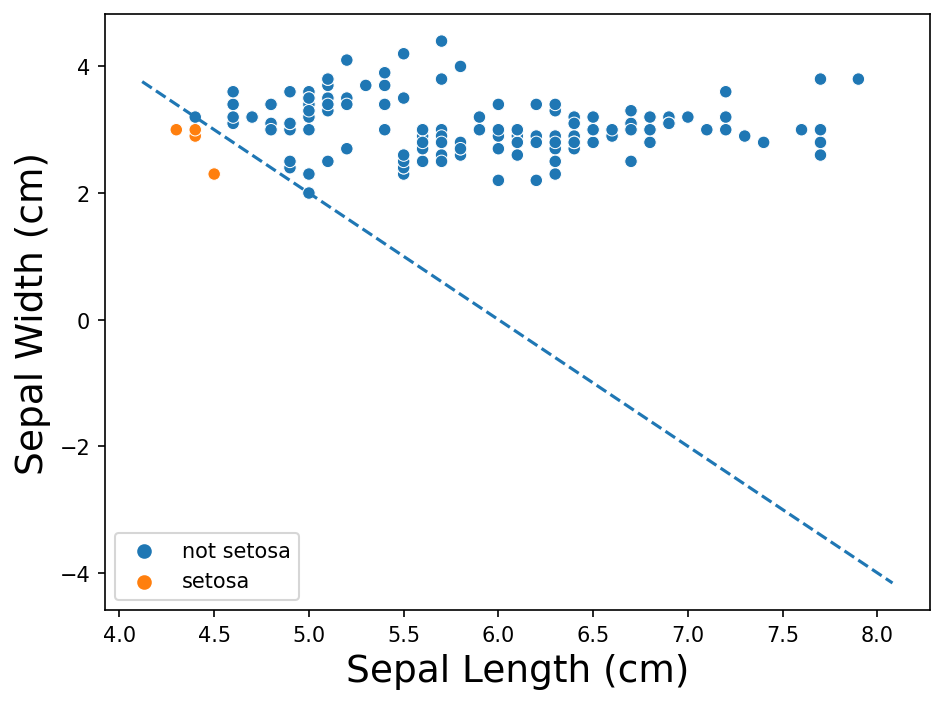

In [11]:
dec_bound_vec_3 = np.array([-2, -1.00, 12])
pred_labels_3 = linear_decision_boundary_classifier(dec_bound_vec_3, features, class_names=class_names)
plot = sns.scatterplot(data=df, x="sepal_length (cm)", y="sepal_width (cm)", hue=pred_labels_3)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
abline(-2, 12)

In [12]:
accuracy_score(df.label, pred_labels_3)

0.30666666666666664

We can see the following accuracy results:
* Boundary 1 - 95.3%
* Boundary 2 - 99.3%
* Boundary 3 - 30.7%

## Part 2 - Predictive Power of Features

In [13]:
vv_df = pd.read_csv('./versicolor_virginica_data.csv')
vv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              100 non-null    object 
 1   sepal_length (cm)  100 non-null    float64
 2   sepal_width (cm)   100 non-null    float64
 3   petal_length (cm)  100 non-null    float64
 4   petal_width (cm)   100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB


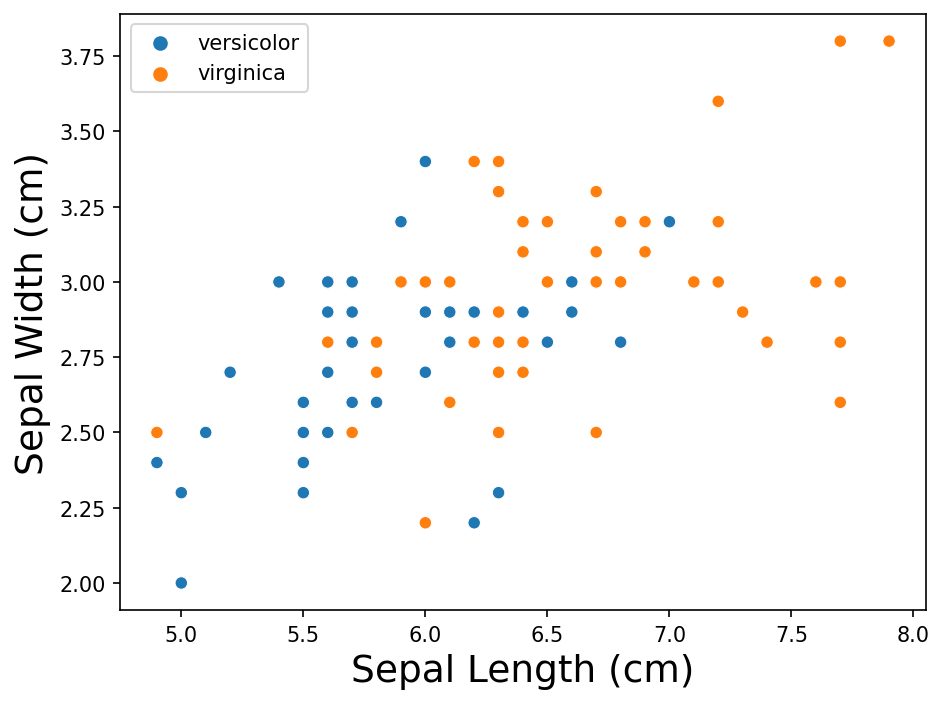

In [14]:
plot = sns.scatterplot(data=vv_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");

## Determine a decision boundary

By just eyeballing the above graph, we need to determine a good boundary.  A vertical line around 6.1 looks pretty good, but a line between (5.8, 3.75) and (6.4, 2.0) also looks pretty good.  `y = -2.9 + 20.6`

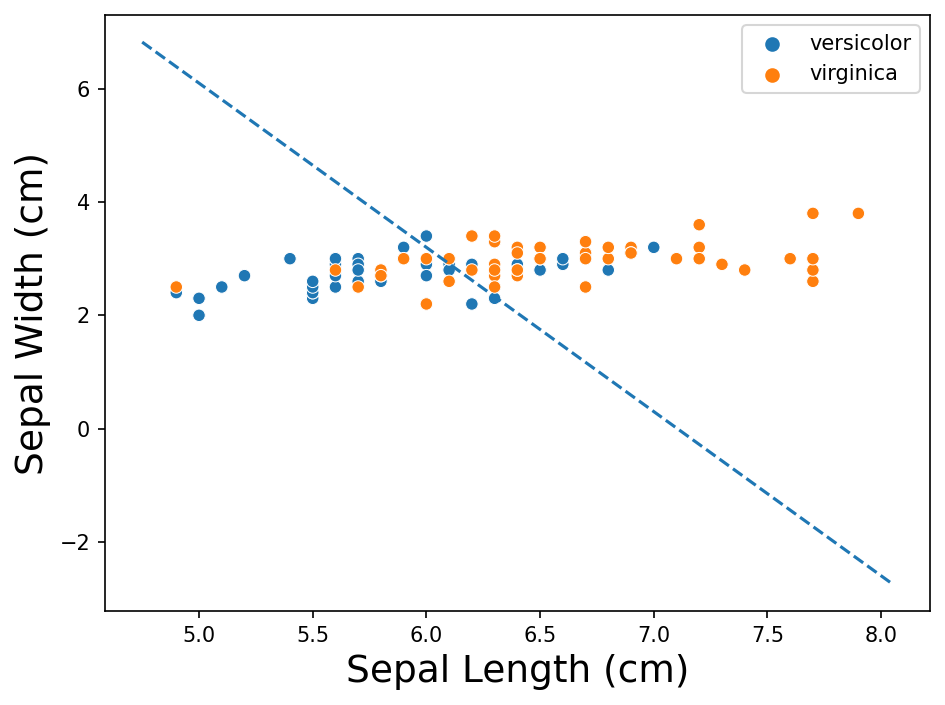

In [15]:
plot = sns.scatterplot(data=vv_df, x="sepal_length (cm)", y="sepal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
abline(-2.9, 20.6)

Now we do a petal length vs. petal width analysis.

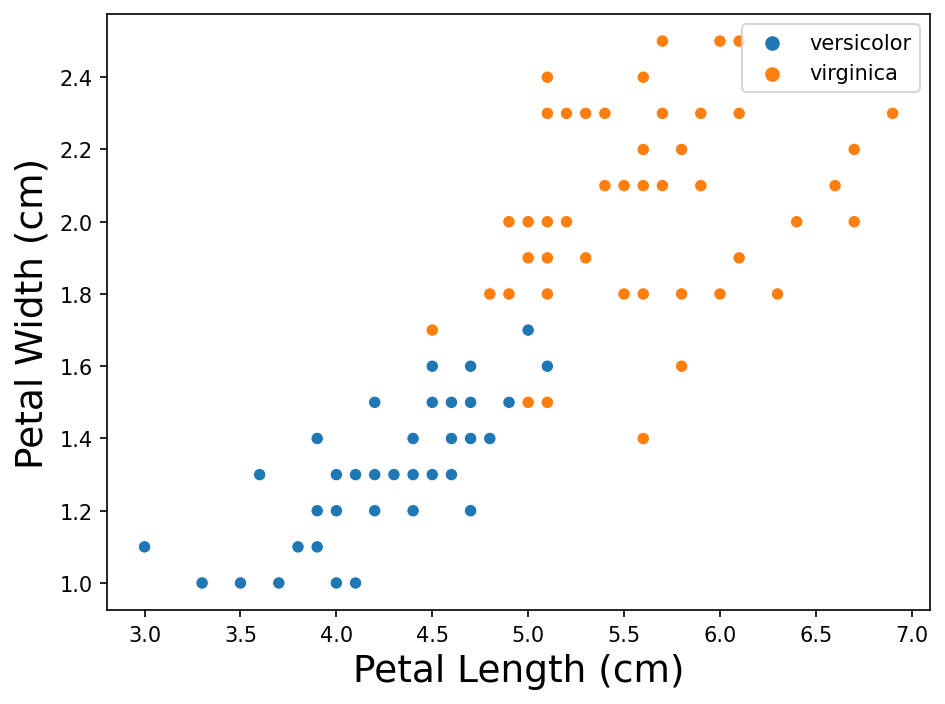

In [17]:
plot = sns.scatterplot(data=vv_df, x="petal_length (cm)", y="petal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Petal Length (cm)", ylabel="Petal Width (cm)");

And another decision boundary by eyeballing it.  Between (4.0, 2.4) and (6.0, 1.0). `y = -0.7x + 5.2`

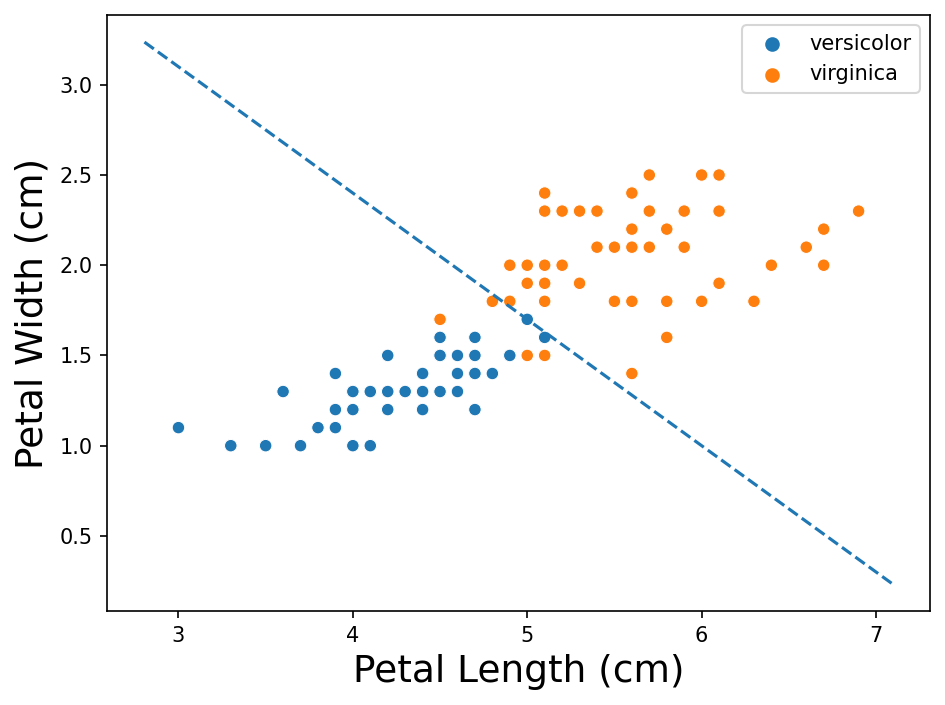

In [18]:
plot = sns.scatterplot(data=vv_df, x="petal_length (cm)", y="petal_width (cm)", hue="label")
plot.get_legend().set_title("")
plot.set(xlabel="Petal Length (cm)", ylabel="Petal Width (cm)");
abline(-0.7, 5.2)

Now we can classify these two functions.

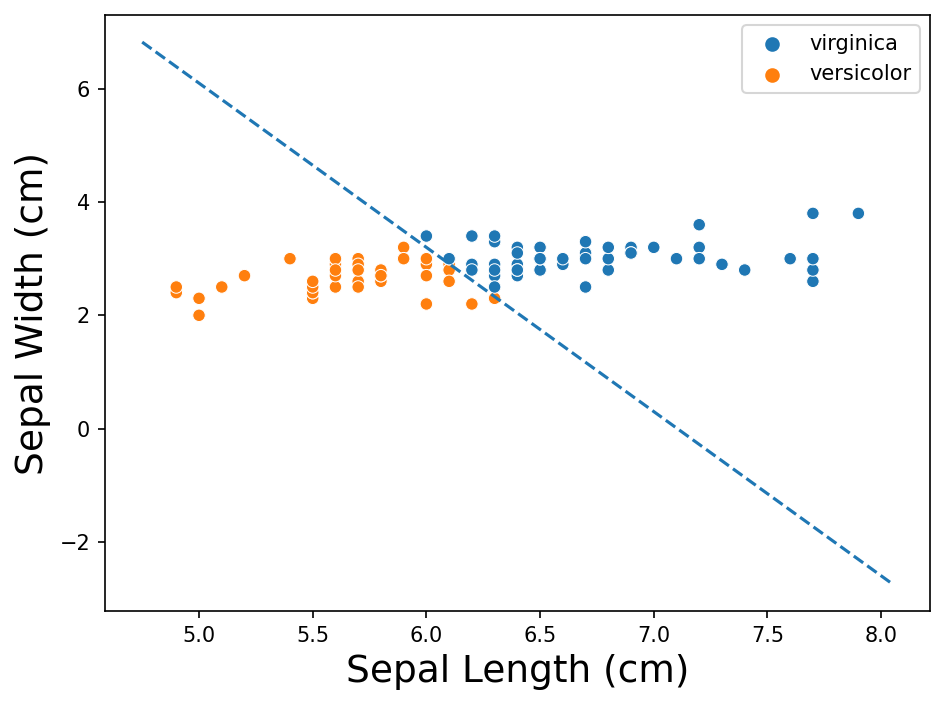

In [19]:
features = vv_df[["sepal_length (cm)", "sepal_width (cm)"]].values
class_names = ["virginica", "versicolor"]
dec_bound_vec = np.array([-2.9, -1.00, 20.6])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, class_names=class_names)
plot = sns.scatterplot(data=vv_df, x="sepal_length (cm)", y="sepal_width (cm)", hue=pred_labels)
plot.get_legend().set_title("")
plot.set(xlabel="Sepal Length (cm)", ylabel="Sepal Width (cm)");
abline(-2.9, 20.6)

In [20]:
accuracy_score(vv_df.label, pred_labels)

0.74

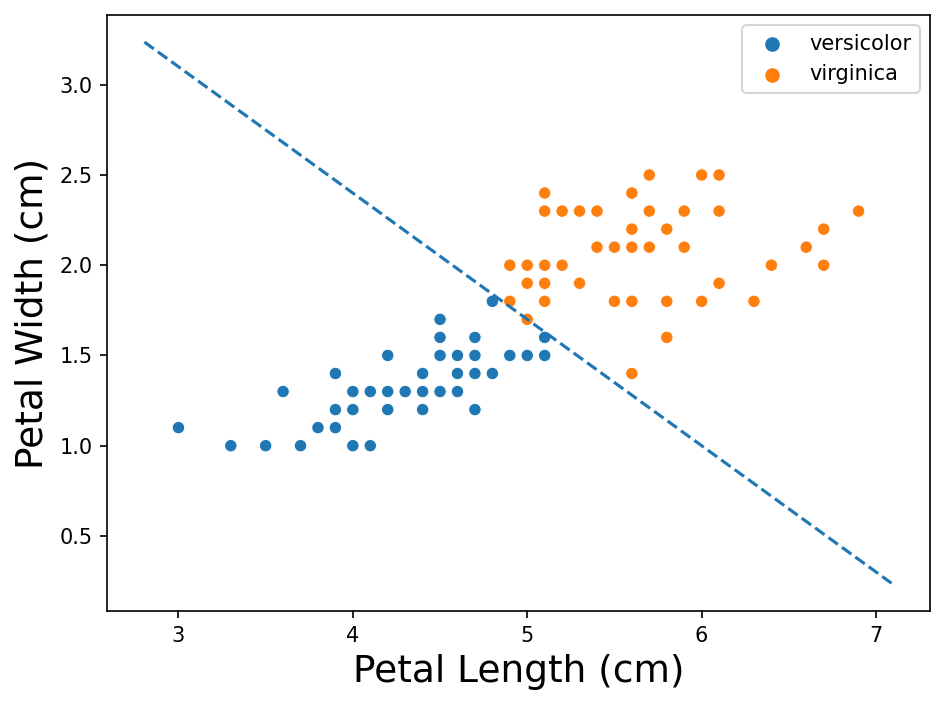

In [21]:
features = vv_df[["petal_length (cm)", "petal_width (cm)"]].values
class_names = ["virginica", "versicolor"]
dec_bound_vec = np.array([-0.7, -1.00, 5.2])
pred_labels = linear_decision_boundary_classifier(dec_bound_vec, features, class_names=class_names)
plot = sns.scatterplot(data=vv_df, x="petal_length (cm)", y="petal_width (cm)", hue=pred_labels)
plot.get_legend().set_title("")
plot.set(xlabel="Petal Length (cm)", ylabel="Petal Width (cm)");
abline(-0.7, 5.2)

In [22]:
accuracy_score(vv_df.label, pred_labels)

0.94

So we get the following accuracy:
* By sepal length/width: 74%
* By petal length/width: 94%